In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model 

In [46]:
loans = pd.read_csv('/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/lending-club-data.csv')  

/Users/kevinwang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [48]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,last_delinq_none,last_record_none,last_major_derog_none
count,1.226070e+05,1.226070e+05,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,1.226030e+05,122607.000000,122578.000000,...,122607.000000,122607.000000,122578.000000,122578.000000,122462.000000,122607.000000,122603.000000,122607.000000,122607.000000,122607.000000
mean,4.728452e+06,5.493222e+06,12809.733743,12736.123753,12497.828395,13.639487,396.623285,7.138502e+04,15.496888,0.211996,...,4.232882,0.597509,0.858107,0.908173,0.996734,0.123672,7.564725,0.588115,0.897795,0.873906
std,5.938517e+06,6.604693e+06,7932.313398,7887.167118,7946.731527,4.390836,239.475936,5.841483e+04,7.497442,0.662052,...,1.362138,0.278934,0.348942,0.288783,0.057059,0.329208,4.127291,0.492177,0.302918,0.331957
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.028895,0.000000,0.000000,0.000000
25%,8.532925e+05,1.064872e+06,6700.000000,6625.000000,6271.000000,10.620000,215.985000,4.405250e+04,9.880000,0.000000,...,3.000000,0.400000,1.000000,1.000000,1.000000,0.000000,4.362575,0.000000,1.000000,1.000000
50%,1.621401e+06,1.879659e+06,11000.000000,10950.000000,10500.000000,13.480000,348.180000,6.000000e+04,15.260000,0.000000,...,4.000000,0.600000,1.000000,1.000000,1.000000,0.000000,6.965760,1.000000,1.000000,1.000000
75%,6.699942e+06,8.117948e+06,17600.000000,17425.000000,17000.000000,16.290000,521.930000,8.500000e+04,20.850000,0.000000,...,5.000000,0.800000,1.000000,1.000000,1.000000,0.000000,10.215850,1.000000,1.000000,1.000000
max,3.784128e+07,4.060424e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.880000,29.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.171000,1.000000,1.000000,1.000000


In [49]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

## Exploring the target column

The target column (label column) of the dataset that we are interested in is called bad_loans. In this column 1 means a risky (bad) loan 0 means a safe loan.

In order to make this more intuitive and consistent with the lectures, we reassign the target to be:

+1 as a safe loan
-1 as a risky (bad) loan

We put this in a new column called safe_loans.

In [50]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
#loans['safe_loans'] = loans['bad_loans'].map({1: 1, 0: -1})

loans = loans.drop('bad_loans', axis = 1)
#loans['safe_loans']

Now, let us explore the distribution of the column safe_loans. This gives us a sense of how many safe and risky loans are present in the dataset. Print out the percentage of safe loans and risky loans in the data frame.

You should have:

Around 81% safe loans
Around 19% risky loans
It looks like most of these loans are safe loans (thankfully). But this does make our problem of identifying risky loans challenging.

In [51]:
sns.distplot(loans['safe_loans'])

## Features for the classification algorithm

In this assignment, we will be using a subset of features (categorical and numeric). The features we will be using are described in the code comments below. If you are a finance geek, the LendingClub website has a lot more details about these features. Extract these feature columns and target column from the dataset. We will only use these features.

In [52]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

print(type(loans))    #df

<class 'pandas.core.frame.DataFrame'>


## One Hot Encoding

Then follow the following steps:

Apply one-hot encoding to loans. Your tool may have a function for one-hot encoding. Alternatively, see #7 for implementation hints.
Load the JSON files into the lists train_idx and validation_idx.
Perform train/validation split using train_idx and validation_idx. In Pandas, for instance:

In [53]:
print(loans.dtypes)
print(type(loans.dtypes))   #series
print(loans.columns)
print(type(loans.columns))   #index
print(zip(loans.columns, loans.dtypes))
print(type(zip(loans.columns, loans.dtypes)))   #zip, each component is a tuple
print(list(zip(loans.columns, loans.dtypes)))    # convert 'zip' type to list
print(type(list(zip(loans.columns, loans.dtypes))[0]))   #tuple

categorical_variables = []
for feat_name, feat_type in zip(loans.columns, loans.dtypes):
    if feat_type == str:
        categorical_variables.append(feat_name)

print(categorical_variables)

grade                     object
sub_grade                 object
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none      int64
revol_util               float64
total_rec_late_fee       float64
safe_loans                 int64
dtype: object
<class 'pandas.core.series.Series'>
Index(['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership',
       'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'safe_loans'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
<class 'zip'>
[('grade', dtype('O')), ('sub_grade', dtype('O')), ('short_emp', dtype('int64')), ('emp_length_num', dtype('int64')), ('home_ownership', dtype('O')), ('dti', dtype('float64')), ('purpose', dtype('O')), ('term', dtype('O')), ('last

## One Hot Encoding

For scikit-learn's decision tree implementation, it requires numerical values for it's data matrix. This means you will have to turn categorical variables into binary features via one-hot encoding. The next assignment has more details about this.

If you are using SFrame, feel free to use this piece of code as is. Refer to the SFrame API documentation for a deeper understanding. If you are using different machine learning software, make sure you prepare the data to be passed to the learning software.



In [54]:
# loans_data = risky_loans.append(safe_loans)

# categorical_variables = []
# for feat_name, feat_type in zip(loans_data.column_names(), loans_data.column_types()):
#     if feat_type == str:
#         categorical_variables.append(feat_name)

# for feature in categorical_variables:
#     loans_data_one_hot_encoded = loans_data[feature].apply(lambda x: {x: 1})
#     loans_data_unpacked = loans_data_one_hot_encoded.unpack(column_name_prefix=feature)

#     # Change None's to 0's
#     for column in loans_data_unpacked.column_names():
#         loans_data_unpacked[column] = loans_data_unpacked[column].fillna(0)

#     loans_data.remove_column(feature)
#     loans_data.add_columns(loans_data_unpacked)      

#Below is what I am learning from the sframe code, not used

print(loans.dtypes)
print(type(loans.dtypes))   #series
print(loans.columns)
print(type(loans.columns))   #index
print(zip(loans.columns, loans.dtypes))
print(type(zip(loans.columns, loans.dtypes)))   #zip, each component is a tuple
print(list(zip(loans.columns, loans.dtypes)))    # convert 'zip' type to list
print(type(list(zip(loans.columns, loans.dtypes))[0]))   #tuple

categorical_variables = []
for feat_name, feat_type in zip(loans.columns, loans.dtypes):
    if feat_type == str:
        categorical_variables.append(feat_name)

print(categorical_variables)

grade                     object
sub_grade                 object
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none      int64
revol_util               float64
total_rec_late_fee       float64
safe_loans                 int64
dtype: object
<class 'pandas.core.series.Series'>
Index(['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership',
       'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'safe_loans'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
<class 'zip'>
[('grade', dtype('O')), ('sub_grade', dtype('O')), ('short_emp', dtype('int64')), ('emp_length_num', dtype('int64')), ('home_ownership', dtype('O')), ('dti', dtype('float64')), ('purpose', dtype('O')), ('term', dtype('O')), ('last

In [55]:
#This part not used.   Learning purpose 
categorical_var = [m for m in loans.columns if loans[m].dtypes == object]
print(categorical_var)
print(loans[categorical_var])
cat_one_hot = pd.get_dummies(loans[categorical_var])
print(cat_one_hot.head())

['grade', 'sub_grade', 'home_ownership', 'purpose', 'term']
       grade sub_grade home_ownership             purpose        term
0          B        B2           RENT         credit_card   36 months
1          C        C4           RENT                 car   60 months
2          C        C5           RENT      small_business   36 months
3          C        C1           RENT               other   36 months
4          A        A4           RENT             wedding   36 months
5          E        E1           RENT                 car   36 months
6          F        F2            OWN      small_business   60 months
7          B        B5           RENT               other   60 months
8          C        C3            OWN  debt_consolidation   60 months
9          B        B5            OWN  debt_consolidation   36 months
10         C        C1           RENT  debt_consolidation   36 months
11         B        B1           RENT         credit_card   36 months
12         B        B2        

In [85]:
#One hot started from here
def one_hot(loans):
    return pd.get_dummies(loans)   # We don't need to identify Str variable, it will just transform 'object' var

loans = one_hot(loans)
print(loans)

        short_emp  emp_length_num    dti  last_delinq_none  \
0               0              11  27.65                 1   
1               1               1   1.00                 1   
2               0              11   8.72                 1   
3               0              11  20.00                 0   
4               0               4  11.20                 1   
5               0              10   5.35                 1   
6               0               5   5.55                 1   
7               1               1  18.08                 1   
8               0               6  16.12                 1   
9               0              11  10.78                 1   
10              1               1  10.08                 1   
11              0               4  12.56                 1   
12              0               4   7.06                 1   
13              1               1  20.31                 1   
14              0               5  18.60                 0   
15      

## Split data into training and validation

Load the JSON files into the lists train_idx and validation_idx.
Perform train/validation split using train_idx and validation_idx. In Pandas, for instance:

In [86]:
import json
with open('/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/module-5-assignment-1-train-idx.json', 'r') as f: # Reads the list of most frequent words
    train_idx = json.load(f)
with open('/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/module-5-assignment-1-validation-idx.json', 'r') as f1: # Reads the list of most frequent words
    validation_idx = json.load(f1)

print(train_idx[0:10])
print(validation_idx[0:10])
train_data = loans.loc[train_idx]
validation_data = loans.loc[validation_idx]
print(train_data.head())
print(validation_data.head())
print(train_data.shape)        #(37224, 13)
print(validation_data.shape)   #(9284, 13)
train_loans_prop = sum(train_data['safe_loans'] == 1)/len(train_data)   #0.503653556845   Means data is very balanced
print(train_loans_prop)
valid_loans_prop = sum(validation_data['safe_loans'] == 1)/len(validation_data)   #0.496553209823   Means data is very balanced
print(valid_loans_prop)

#train_data['safe_loans'] = train_data['bad_loans'].apply(lambda x : +1 if x==0 else -1)
#train_data= train_data.drop('bad_loans', axis = 1)
y = train_data['safe_loans']
x = train_data.drop('safe_loans', axis=1)

#validation_data['safe_loans'] = validation_data['bad_loans'].apply(lambda x : +1 if x==0 else -1)
#validation_data= validation_data.drop('bad_loans', axis = 1)
y_valid = validation_data['safe_loans']
x_valid = validation_data.drop('safe_loans', axis=1)

[1, 6, 7, 10, 12, 18, 21, 23, 45, 48]
[24, 41, 60, 93, 132, 160, 162, 175, 184, 270]
    short_emp  emp_length_num    dti  last_delinq_none  last_major_derog_none  \
1           1               1   1.00                 1                      1   
6           0               5   5.55                 1                      1   
7           1               1  18.08                 1                      1   
10          1               1  10.08                 1                      1   
12          0               4   7.06                 1                      1   

    revol_util  total_rec_late_fee  safe_loans  grade_A  grade_B  \
1          9.4                 0.0          -1        0        0   
6         32.6                 0.0          -1        0        0   
7         36.5                 0.0          -1        0        1   
10        91.7                 0.0          -1        0        0   
12        55.5                 0.0          -1        0        1   

         ...       

## Build a decision tree classifier

Now, let's use the built-in scikit learn decision tree learner (sklearn.tree.DecisionTreeClassifier) to create a loan prediction model on the training data. To do this, you will need to import sklearn, sklearn.tree, and numpy.

Note: You will have to first convert the SFrame into a numpy data matrix, and extract the target labels as a numpy array (Hint: you can use the .to_numpy() method call on SFrame to turn SFrames into numpy arrays). See the API for more information. Make sure to set max_depth=6.

Call this model decision_tree_model.

Also train a tree using with max_depth=2. Call this model small_model.

In [87]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier(max_depth=6.)
decision_tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
decision_tree_model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
y_train_predict = decision_tree_model.predict(x)
y_valid_predict = decision_tree_model.predict(x_valid)
from sklearn.metrics import accuracy_score

print(accuracy_score(y, y_train_predict))
print(accuracy_score(y_valid, y_valid_predict))

0.640527616591
0.636148211978


In [90]:
small_model = tree.DecisionTreeClassifier(max_depth=2)
small_model
small_model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
y_valid_predict = small_model.predict(x)
y_valid_predict = small_model.predict(x_valid)
from sklearn.metrics import accuracy_score

print(accuracy_score(y, y_train_predict))
print(accuracy_score(y_valid, y_valid_predict))

0.640527616591
0.619345109866


In [92]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_valid, y_valid_predict),
    columns=['Predicted Not', 'Predicted Yes'],
    index=['True Not', 'True Yes']
)

,Predicted Not,Predicted Yes
True Not,3342,1332
True Yes,2202,2408


In [93]:
#tree.export_graphviz(small_model, out_file=None, feature_names=x_valid.columns)
import pydot
tree.export_graphviz(small_model, out_file='/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/simple_tree.dot', feature_names=x_valid.columns)

# Convert a .dot file to .png
from graphviz import render
render('dot', 'png', '/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/simple_tree.dot')

#from subprocess import call       #Covert the Dot file to Png file to visualize
#call(['dot', '-T', 'png', '/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/simple_tree.dot', '-o', '/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/simple_tree.png'])

'/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/simple_tree.dot.png'

Visualizing a learned model (Optional)
10a. For this optional section, we would like to see what the small learned tree looks like. If you are using scikit-learn and have the package Graphviz, then you will be able to perform this section. If you are using a different software, try your best to follow along.

Visualize small_model in the software of your choice.

Making predictions
Let's consider two positive and two negative examples from the validation set and see what the model predicts. We will do the following:

Predict whether or not a loan is safe.
Predict the probability that a loan is safe.
11. First, let's grab 2 positive examples and 2 negative examples. In SFrame, that would be:

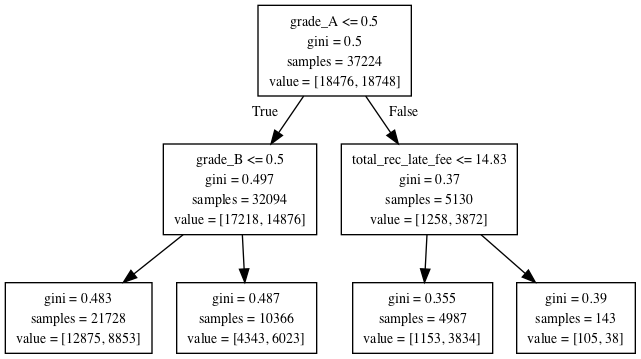

In [94]:
from IPython.display import Image  
import pydot
from sklearn.externals.six import StringIO
dot_data = StringIO()  
tree.export_graphviz(small_model, out_file=dot_data, feature_names=x_valid.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week3/simple_tree.pdf")
Image(graph[0].create_png()) 

## Making predictions
Let's consider two positive and two negative examples from the validation set and see what the model predicts. We will do the following:

Predict whether or not a loan is safe.
Predict the probability that a loan is safe.

First, let's grab 2 positive examples and 2 negative examples. In SFrame, that would be:

In [95]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
19,0,11,11.18,1,1,82.4,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
79,0,10,16.85,1,1,96.4,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
24,0,3,13.97,0,1,59.5,0.0,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
41,0,11,16.33,1,1,62.1,0.0,-1,1,0,...,0,0,0,0,0,0,0,0,1,0


Now, we will use our model to predict whether or not a loan is likely to default. For each row in the sample_validation_data, use the decision_tree_model to predict whether or not the loan is classified as a safe loan. (Hint: if you are using scikit-learn, you can use the .predict() method)


In [100]:
y_sample = sample_validation_data['safe_loans']
x_sample = sample_validation_data.drop('safe_loans', axis=1)

y_sample_predict = decision_tree_model.predict(x_sample)
print(y_sample_predict)
print(y_sample)

from sklearn.metrics import accuracy_score

accuracy_score(y_sample, y_sample_predict)     ## 1 is safe loan

[ 1 -1 -1  1]
19    1
79    1
24   -1
41   -1
Name: safe_loans, dtype: int64


0.5

Quiz Question: What percentage of the predictions on sample_validation_data did decision_tree_model get correct?
    
Answer: 50%

## Explore probability predictions

For each row in the sample_validation_data, what is the probability (according decision_tree_model) of a loan being classified as safe? (Hint: if you are using scikit-learn, you can use the .predict_proba() method)

Note: 1 is safe loan

Checkpoint: Can you verify that for all the predictions with probability >= 0.5, the model predicted the label +1?

In [129]:
prob = decision_tree_model.predict_proba(x_sample)[:,1]     # [:,0] is probablity of -1    [:,1] is probablity of 1
print(decision_tree_model.predict_proba(x_sample))         

[[ 0.34156543  0.65843457]
 [ 0.53630646  0.46369354]
 [ 0.64750958  0.35249042]
 [ 0.20789474  0.79210526]]


Quiz Question: Which loan has the highest probability of being classified as a safe loan?    

Answer: Fourth loan, with probability = 0.79210526

## Tricky predictions!

Now, we will explore something pretty interesting. For each row in the sample_validation_data, what is the probability (according to small_model) of a loan being classified as safe?

In [130]:
print(y_sample_predict)
print(y_sample)

y_sampe_small_predict = small_model.predict(x_sample)

from sklearn.metrics import accuracy_score

accuracy_score(y_sample, y_sampe_small_predict)     ## 1 is safe loan
print(small_model.predict_proba(x_sample))  

[ 1 -1 -1  1]
19    1
79    1
24   -1
41   -1
Name: safe_loans, dtype: int64
[[ 0.41896585  0.58103415]
 [ 0.59255339  0.40744661]
 [ 0.59255339  0.40744661]
 [ 0.23120112  0.76879888]]


Quiz Question: Notice that the probability preditions are the exact same for the 2nd and 3rd loans. Why would this happen?

Answer: The small model only use grade_A, grade_B, total_rec_late_fee three variables, so probabaly these two observations has the same value for this three features.

## Visualize the prediction on a tree

This part very boring, can ignore! 

Note that you should be able to look at the small tree (of depth 2), traverse it yourself, and visualize the prediction being made. Consider the following point in the sample_validation_data:

Quiz Question: Based on the visualized tree, what prediction would you make for this data point (according to small_model)? (If you don't have Graphviz, you can answer this quiz question by executing the next part.)

In [131]:
print(sample_validation_data[['grade_A','grade_B','total_rec_late_fee']])

    grade_A  grade_B  total_rec_late_fee
19        0        1                 0.0
79        0        0                 0.0
24        0        0                 0.0
41        1        0                 0.0


## Evaluating accuracy of the decision tree model

Recall that the accuracy is defined as follows:

accuracy=# correctly classified data points / # total data points

Evaluate the accuracy of small_model and decision_tree_model on the training data. (Hint: if you are using scikit-learn, you can use the .score() method)

====>   Already calculated above


Now, evaluate the accuracy of the small_model and decision_tree_model on the entire validation_data, not just the subsample considered above.

Quiz Question: What is the accuracy of decision_tree_model on the validation set, rounded to the nearest .01?

Answer: 0.636148211978

## Evaluating accuracy of a complex decision tree model

Here, we will train a large decision tree with max_depth=10. This will allow the learned tree to become very deep, and result in a very complex model. Recall that in lecture, we prefer simpler models with similar predictive power. This will be an example of a more complicated model which has similar predictive power, i.e. something we don't want.

Using sklearn.tree.DecisionTreeClassifier, train a decision tree with maximum depth = 10. Call this model big_model.

Evaluate the accuracy of big_model on the training set and validation set.

Checkpoint: We should see that big_model has even better performance on the training set than decision_tree_model did on the training set.

In [132]:
big_model = tree.DecisionTreeClassifier(max_depth=10)
big_model

big_model.fit(x, y)

y_train_predict = big_model.predict(x)
y_valid_predict = big_model.predict(x_valid)

from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_train_predict))
print(accuracy_score(y_valid, y_valid_predict))

0.663845905867
0.62731581215


Quiz Question: How does the performance of big_model on the validation set compare to decision_tree_model on the validation set? Is this a sign of overfitting?

Answer: Training is better, validation gets worse, a little bit of sign

## Quantifying the cost of mistakes

Every mistake the model makes costs money. In this section, we will try and quantify the cost each mistake made by the model. Assume the following:

False negatives: Loans that were actually safe but were predicted to be risky. This results in an oppurtunity cost of loosing a loan that would have otherwise been accepted.

False positives: Loans that were actually risky but were predicted to be safe. These are much more expensive because it results in a risky loan being given.

Correct predictions: All correct predictions don't typically incur any cost.
Let's write code that can compute the cost of mistakes made by the model. Complete the following 4 steps:

First, let us compute the predictions made by the model.
Second, compute the number of false positives.
Third, compute the number of false negatives.
Finally, compute the cost of mistakes made by the model by adding up the costs of true positives and false positves.


In [133]:
y_valid_predict = decision_tree_model.predict(x_valid)
valid_size = len(x_valid)
print(valid_size)

false_neg = sum(y_valid_predict < y_valid)    # y predicted 0 (risky), but actually 1 (safe)
false_pos = sum(y_valid_predict > y_valid)    # y predicted 1 (safe), but actually 0 (risky)

print(false_neg)
print(false_pos)

print('false_neg =' + str(false_neg/valid_size) )
print('false_pos =' + str(false_pos/valid_size) )

print('Cost = ' + str(10000*false_neg + 20000*false_pos))

9284
1717
1661
false_neg =0.184941835416
false_pos =0.178909952607
Cost = 50390000


Quiz Question: Let's assume that each mistake costs us money: a false negative costs $10,000, while a false positive positive costs $20,000. What is the total cost of mistakes made by decision_tree_model on validation_data?

Answer: 50390000